# Importing Files and Packages


In [30]:
from google.colab import files
uploaded = files.upload()                   #Choose the train.csv file

Saving new_train.csv to new_train (1).csv


In [31]:
from google.colab import files
uploaded1 = files.upload()                #Choose the test.csv file

Saving new_test.csv to new_test (1).csv


In [32]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [33]:
import io
pre = pd.read_csv(io.BytesIO(uploaded1['new_test.csv']))

In [34]:
import io
data = pd.read_csv(io.BytesIO(uploaded['new_train.csv']))

# Data Cleaning (So that it can be Processed)

In [35]:
data.head()

,date,temp
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12
3,04-01-1980,9.23
4,05-01-1980,3.20


In [36]:
data.columns=['ds','y']

In [37]:
data.head()

,ds,y
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12
3,04-01-1980,9.23
4,05-01-1980,3.20


# EDA 

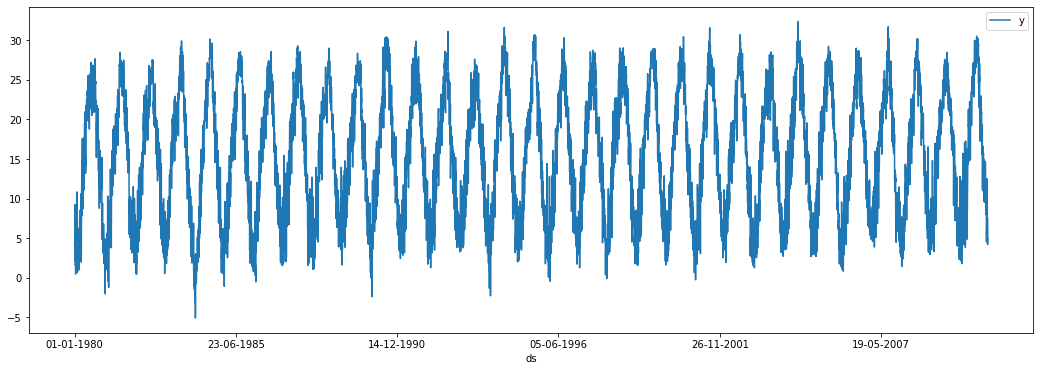

In [38]:
data.plot(x='ds',y='y',figsize=(18,6))

In [39]:
print(f'Training data.csv : {data.shape}')
data.head(3)

Training data.csv : (11323, 2)


,ds,y
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12


In [40]:
data["ds"]= pd.to_datetime(data["ds"])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11323 entries, 0 to 11322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      11323 non-null  datetime64[ns]
 1   y       11323 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 177.0 KB


In [43]:
df1 = data[9497:]

In [83]:
df1.head() #Last 4 years

,ds,y
9497,2006-01-01,4.44
9498,2006-02-01,3.58
9499,2006-03-01,2.92
9500,2006-04-01,2.97
9501,2006-05-01,1.56


# Predicting the Temperature

In [70]:
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
pre.columns=["ds"]

In [72]:
pre['ds']= pd.to_datetime(pre['ds'])

In [73]:
future = m.make_future_dataframe(periods=3561,freq='D')
forecast1 = m.predict(pre)

In [74]:
forecast= forecast1[-3561:]

# Visual Analysis of the Prediction

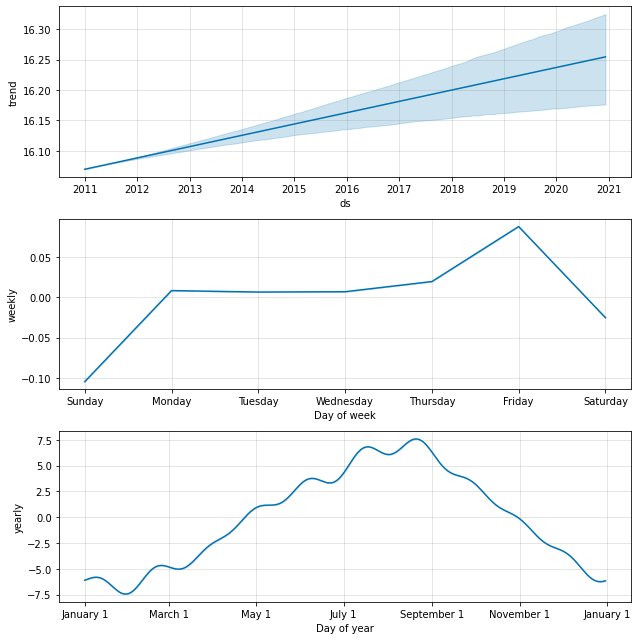

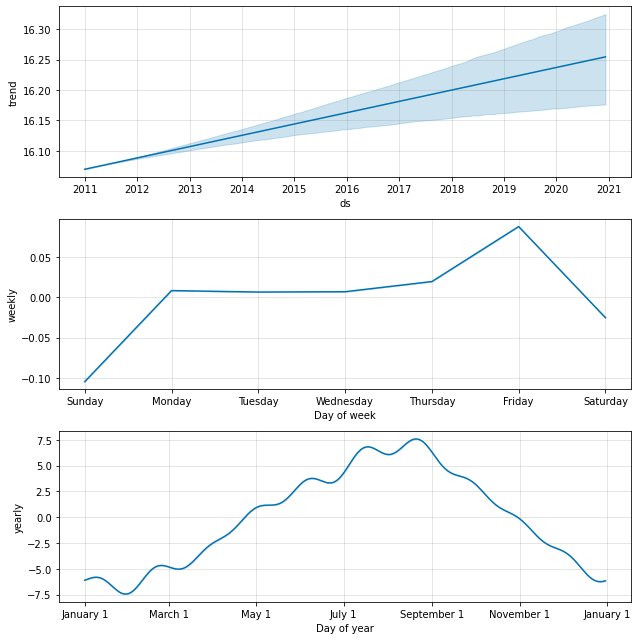

In [75]:
m.plot_components(forecast)

In [76]:
prediction = forecast[["ds", "yhat"]]

In [77]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3561 entries, 0 to 3560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3561 non-null   datetime64[ns]
 1   yhat    3561 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.8 KB


# Predicted Values

In [78]:
prediction

,ds,yhat
0,2011-01-01,9.912802
1,2011-01-02,9.881521
2,2011-01-03,10.045435
3,2011-01-04,10.094394
4,2011-01-05,10.142772
...,...,...
3556,2020-12-05,12.591405
3557,2020-12-06,12.397677
3558,2020-12-07,12.386056
3559,2020-12-08,12.249612


In [79]:
predict= prediction["yhat"]

In [80]:
predict.name="prediction"

In [81]:
predict

0        9.912802
1        9.881521
2       10.045435
3       10.094394
4       10.142772
          ...    
3556    12.591405
3557    12.397677
3558    12.386056
3559    12.249612
3560    12.106283
Name: prediction, Length: 3561, dtype: float64

# Downloading the Prediction as .csv File

In [82]:
#from google.colab import files
#predict.to_csv('Completed.csv', index=False) 
#files.download('Completed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
